<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [POLR1] - Complexity Syndrome
<!-- DESC --> Illustration of the problem of complexity with the polynomial regression
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Visualizing and understanding under and overfitting
 
## What we're going to do :

We are looking for a polynomial function to approximate the observed series :  
$ y = a_n\cdot x^n + \dots + a_i\cdot x^i + \dots + a_1\cdot x + b $  


## Step 1 - Import and init

In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as ooo

place, dataset_dir = ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.57 DEV
Run time             : Wednesday 9 September 2020, 10:55:05
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Current place        : Fidle at IDRIS
Dataset dir          : /gpfswork/rech/mlh/commun/datasets
Update keras cache   : Done


## Step 2 - Preparation of learning data :

Nombre de points : 100  a=[ 1.41826956 -0.83144866 -1.51327976  1.94373982  0.40779941  0.27072661
 -0.33499448] deg=7 bruit=2000


#### Before normalization :


Données d'aprentissage brute :
(100 points visibles sur 100)


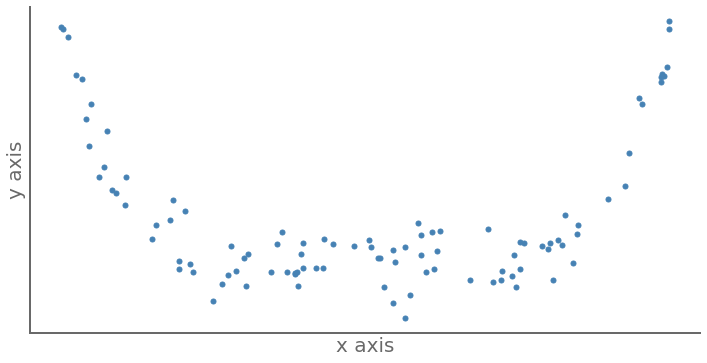

X        :      mean=     +0.0445  std=     +2.9239    min=     -4.8617    max=     +4.9884
Y        :      mean=  +3580.6573  std=  +6410.2282    min=  -5081.2711    max= +20616.3219


#### After normalization :


Données d'aprentissage normalisées :
(100 points visibles sur 100)


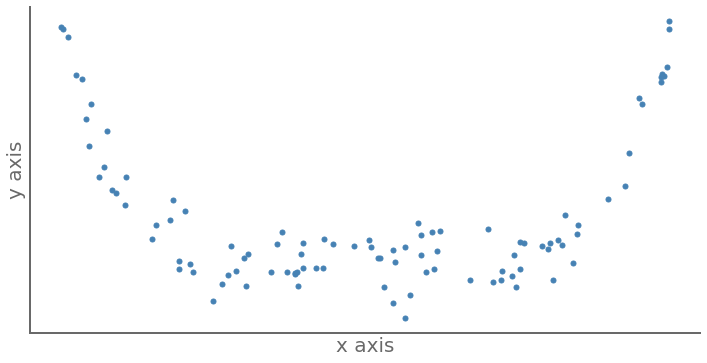

X_norm   :      mean=     -0.0000  std=     +1.0000    min=     -1.6779    max=     +1.6908
Y_norm   :      mean=     +0.0000  std=     +1.0000    min=     -1.3513    max=     +2.6576


In [2]:
# ---- Parameters

n         = 100

xob_min   = -5
xob_max   = 5

deg       =  7
a_min     = -2
a_max     =  2

noise     =  2000

# ---- Train data
#      X,Y              : data
#      X_norm,Y_norm    : normalized data

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

a = np.random.uniform(a_min,a_max, (deg,))
fy = np.poly1d( a )

Y = fy(X) + N

# ---- Data normalization
#
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# ---- Data visualization

width = 12
height = 6
nb_viz = min(2000,n)

def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))


print("Nombre de points : {}  a={} deg={} bruit={}".format(n,a,deg,noise))

ooo.display_md('#### Before normalization :')
print("\nDonnées d'aprentissage brute :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

ooo.display_md('#### After normalization :')
print("\nDonnées d'aprentissage normalisées :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


## Step 3 - Polynomial regression with NumPy
### 3.1 - Underfitting

In [3]:
def draw_reg(X_norm, Y_norm, x_hat,fy_hat, size):
    plt.figure(figsize=size)
    plt.plot(X_norm, Y_norm, '.')

    x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

    plt.plot(x_hat, fy_hat(x_hat))
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.show()

Nombre de degrés : 1 a_hat=[ 5.53720655e-03 -1.11022302e-17]


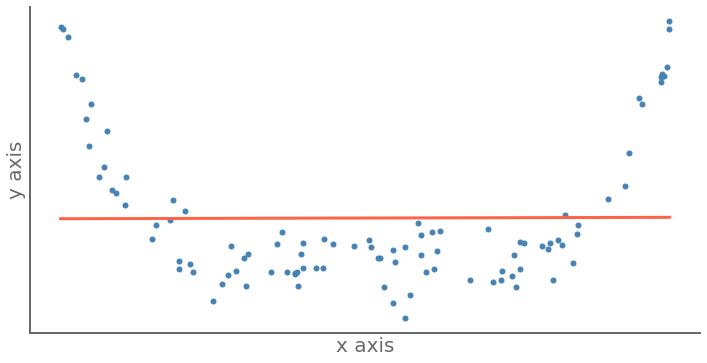

In [4]:
reg_deg=1

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

### 3.2 - Good fitting

Nombre de degrés : 5 a_hat=[-0.01689547  0.55290739  0.00810945 -0.50055836  0.00632176 -0.53347921]


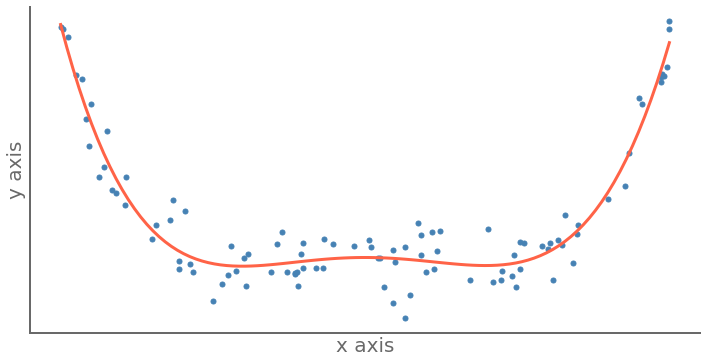

In [5]:
reg_deg=5

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

### 3.3 - Overfitting

Nombre de degrés : 24 a_hat=[-1.41154188e-01  5.08303504e-01  2.13232647e+00 -9.51485222e+00
 -1.23788649e+01  7.81408309e+01  2.96969938e+01 -3.68810764e+02
  1.25166932e+01  1.10158656e+03 -2.62830614e+02 -2.16238513e+03
  7.25200748e+02  2.80702139e+03 -1.03329926e+03 -2.36528631e+03
  8.45637854e+02  1.23558721e+03 -3.86361688e+02 -3.67187064e+02
  8.75065204e+01  5.27713214e+01 -7.69147086e+00 -2.46491363e+00
 -3.88558688e-01]


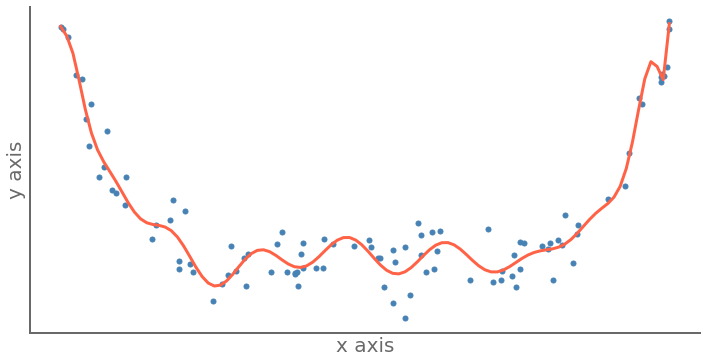

In [6]:
reg_deg=24

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>